In [1]:
from scipy.stats import kstest
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import seaborn as sns
from IPython.display import Image

%load_ext autotime

time: 436 µs (started: 2024-04-06 15:11:50 +02:00)


In [2]:

# Generate 1000 points from a normal distribution
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Generate 1000 points from a uniform distribution
uniform_data = np.random.uniform(low=0, high=1, size=1000)

# Perform the Kolmogorov-Smirnov test for normality on the normally distributed data
ks_statistic_normal, p_value_normal = kstest(normal_data, 'norm')

# Perform the Kolmogorov-Smirnov test for normality on the uniformly distributed data
ks_statistic_uniform, p_value_uniform = kstest(uniform_data, 'norm')

print(f"Normal Distribution - KS Statistic: {ks_statistic_normal:.4f}, P-value: {p_value_normal:.4f}")
print(f"Uniform Distribution - KS Statistic: {ks_statistic_uniform:.4f}, P-value: {p_value_uniform:.4f}")



Normal Distribution - KS Statistic: 0.0353, P-value: 0.1609
Uniform Distribution - KS Statistic: 0.5012, P-value: 0.0000
time: 56.2 ms (started: 2024-04-06 15:11:50 +02:00)


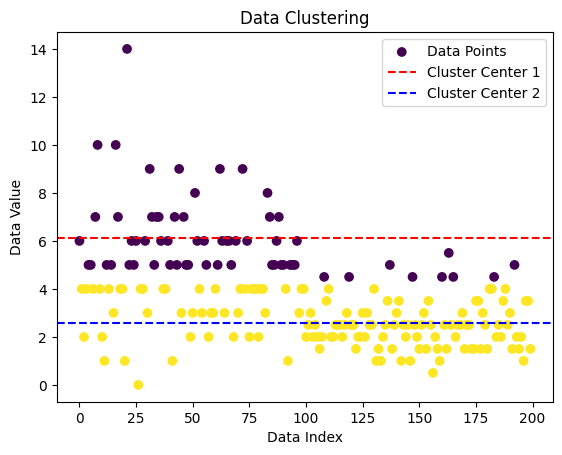

Estimated multiplication factor between subsets: 2.37
time: 672 ms (started: 2024-04-06 15:11:50 +02:00)


In [3]:

# Simulating data for demonstration: 
# 100 points from a Poisson distribution with lambda=5 (subset 1)
# and 100 points from the same distribution but scaled down by a factor of 2 (subset 2)
data_subset_1 = np.random.poisson(5, 100)
data_subset_2 = np.random.poisson(5, 100) / 2  # scaled by a factor of 2
data = np.concatenate([data_subset_1, data_subset_2])

# Reshaping data for KMeans
data_reshaped = data.reshape(-1, 1)

# Clustering the data into 2 groups
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_reshaped)

# Getting the cluster centers
centers = kmeans.cluster_centers_.flatten()

# Estimating the multiplication factor
# Assuming the larger mean should be divided by the smaller one to find the factor
multiplication_factor = max(centers) / min(centers)

# Plotting for visualization
plt.scatter(range(len(data)), data, c=kmeans.labels_, cmap='viridis', label='Data Points')
plt.axhline(y=centers[0], color='r', linestyle='--', label='Cluster Center 1')
plt.axhline(y=centers[1], color='b', linestyle='--', label='Cluster Center 2')
plt.title('Data Clustering')
plt.xlabel('Data Index')
plt.ylabel('Data Value')
plt.legend()
plt.show()

print(f"Estimated multiplication factor between subsets: {multiplication_factor:.2f}")


In [8]:
penguins = sns.load_dataset("penguins")

time: 53.6 ms (started: 2024-04-06 15:12:30 +02:00)


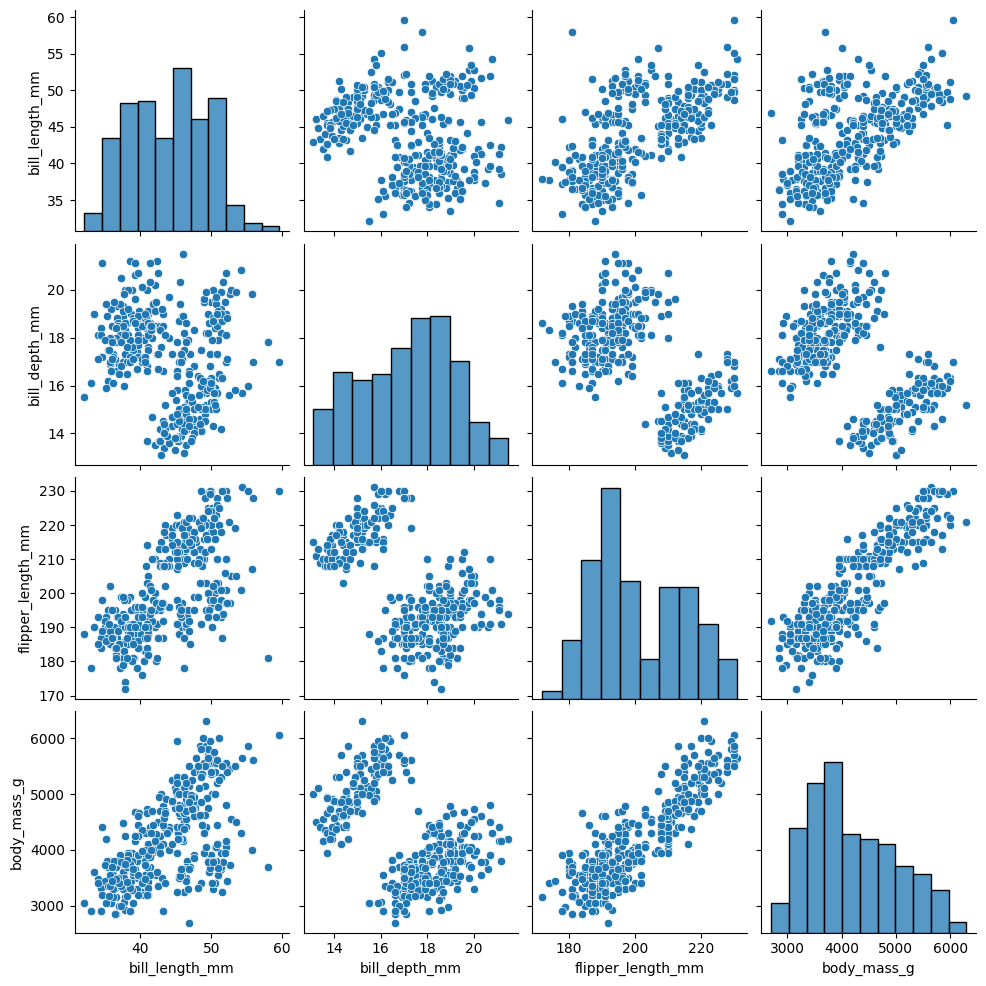

time: 5.69 s (started: 2024-04-06 15:12:53 +02:00)


In [9]:
sns.pairplot(penguins)

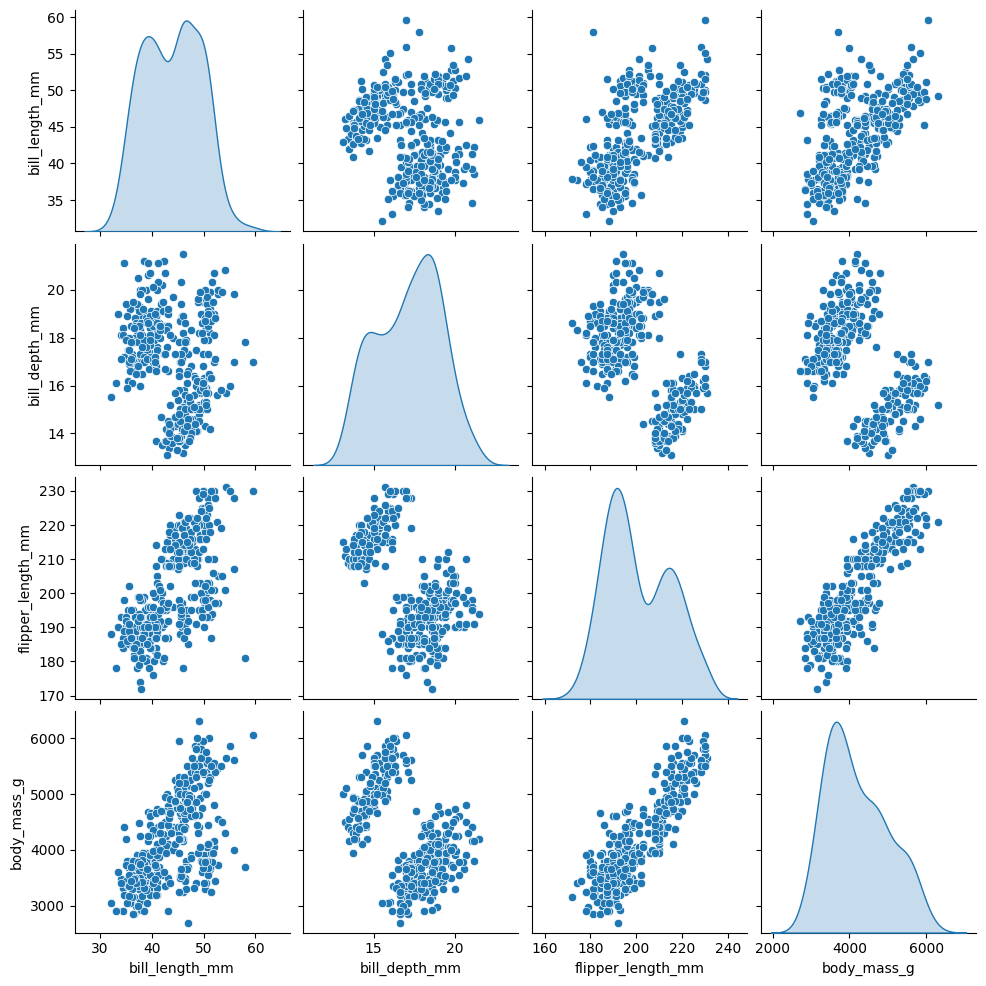

time: 7.24 s (started: 2024-04-06 15:12:58 +02:00)


In [10]:
sns.pairplot(penguins, diag_kind='kde')

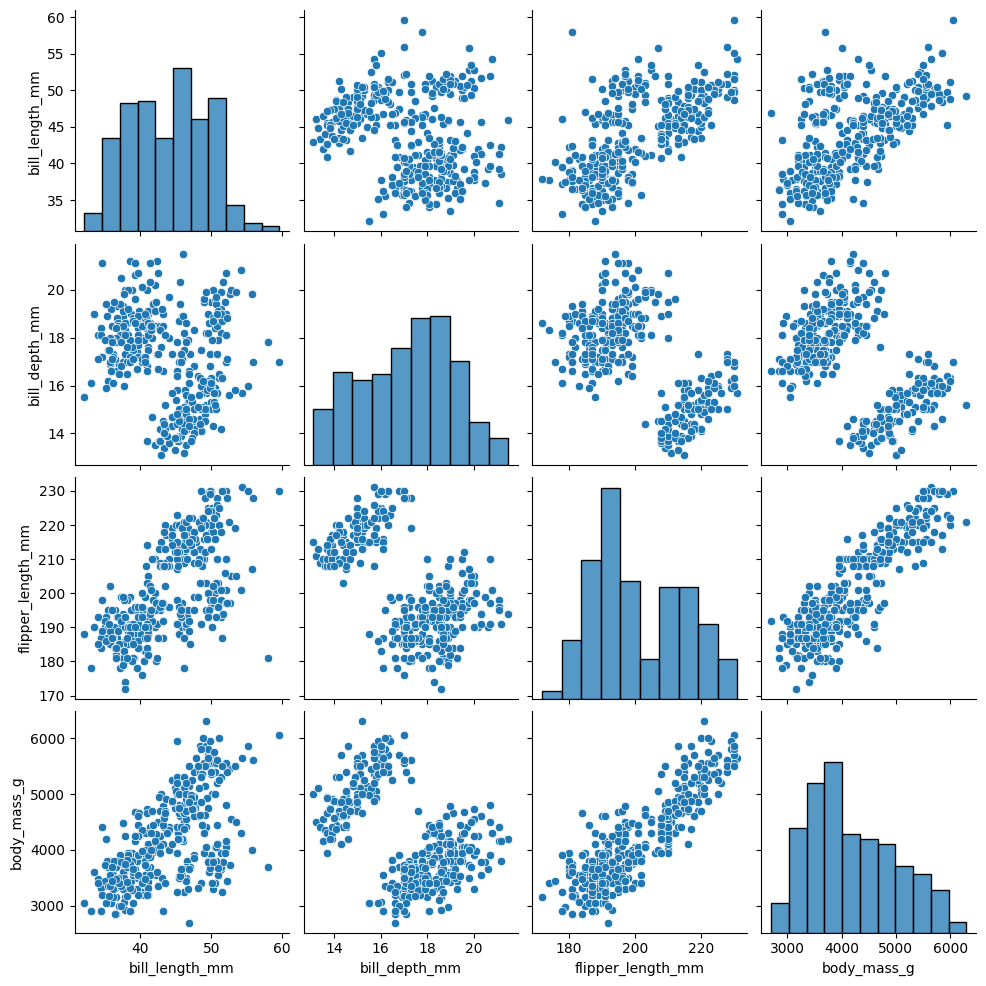

<Figure size 1000x1000 with 0 Axes>

time: 6.09 s (started: 2024-04-06 15:13:22 +02:00)


In [12]:
sns_plot = sns.pairplot(penguins)
sns_plot.savefig("penguins.png")
plt.clf() # Clean parirplot figure from sns 
Image(filename='penguins.png') # Show pairplot as image